In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 14.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [21]:
!yolo pose predict model=yolov8n-pose.pt source=/content/pop.jpg show=True

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 941, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 145, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 285, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 910, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 837, in torch_safe_load
    ckpt = torch.load(fi

In [20]:
import cv2
from google.colab.patches import cv2_imshow
model=YOLO('yolov8n-pose.pt')
img=cv2.imread('/content/pop.jpg')
cv2_imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'yolov11n-pose.pt'

In [22]:
results=model(img)
#print(len(results)) -> 1. 사진 한 장만 넣었으니까. 두 장 넣으면 2.
#print(results[0]) 분해해보려면 0으로 들어가야함
#print(results[0].keypoints) 결과값을 다 읽어줌. 여기서 xy좌표가 필요함
#print(results[0].keypoints.xy)  tensor어쩌고
#print(results[0].keypoints.xy.shape)  torch.Size([1, 17, 2])
#17개의 키포인트, enumerate 사용해서 0번xy좌표, 1번xy좌표...16번xy좌표 나오게
#print(results[0].keypoints.xy[0]) 하면 []하나 벗겨짐
'''for i,xy in enumerate(results[0].keypoints.xy[i][i]):
  print(i, xy)'''
for result in results:
  keypoints=result.keypoints.xy[0]
  for i, keypoint in enumerate(keypoints):
    print(f'{i}: {keypoint[0]}, {keypoint[1]}')
//241127


0: 384x640 1 person, 160.8ms
Speed: 3.2ms preprocess, 160.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


(167, 46)
(181, 59)
(178, 78)


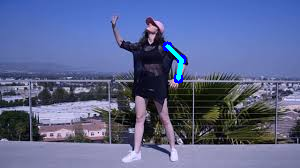

In [18]:
points_ind = [5, 7, 9]
points=[]
keypoints=results[0].keypoints.xy[0]
for i in points_ind:
  x,y=map(int, keypoints[i])
  cv2.circle(img, (x, y), 5, (255, 0, 0), -1)
  points.append((x,y))

print(points[0])
print(points[1])
print(points[2])

cv2.line(img, (points[0]), (points[1]), (255,255,0), 3)
cv2.line(img, (points[1]), (points[2]), (255,255,0), 3)
cv2_imshow(img)

123.90627698844216


array([[[171,  84,  50],
        [171,  84,  50],
        [172,  85,  51],
        ...,
        [180,  93,  59],
        [180,  93,  59],
        [180,  93,  59]],

       [[172,  85,  51],
        [172,  85,  51],
        [172,  85,  51],
        ...,
        [180,  93,  59],
        [180,  93,  59],
        [180,  93,  59]],

       [[173,  86,  52],
        [173,  86,  52],
        [174,  87,  53],
        ...,
        [181,  94,  60],
        [181,  94,  60],
        [181,  94,  60]],

       ...,

       [[151, 113, 111],
        [151, 113, 111],
        [152, 114, 112],
        ...,
        [156, 118, 116],
        [156, 118, 116],
        [156, 118, 116]],

       [[151, 113, 111],
        [151, 113, 111],
        [152, 114, 112],
        ...,
        [155, 117, 115],
        [155, 117, 115],
        [155, 117, 115]],

       [[151, 113, 111],
        [151, 113, 111],
        [152, 114, 112],
        ...,
        [155, 117, 115],
        [155, 117, 115],
        [155, 117, 115]]], dtype=uint8)
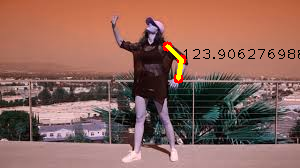

In [38]:
import numpy as np

def calculate_angle(a, b, c):
  a = np.array(a)
  b = np.array(b)
  c = np.array(c)

  radians = np.arctan2(c[1]-b[1], c[0]-b[0])-np.arctan2(a[1]-b[1], a[0]-b[0])
  angle = np.abs(radians*180.0/np.pi)

  if angle>180.0:
    angle=360-angle

  return angle

angle = calculate_angle(points[0], points[1], points[2])
print(angle)
#print(f'angle : {int(angle)}')
cv2.putText(img, f"{angle}", points[1], cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 0), 1)

241128

In [40]:
!yolo pose predict model=yolo11n-pose.pt source=/content/pop.jpg show=True

100% 5.97M/5.97M [00:00<00:00, 74.7MB/s]
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs

image 1/1 /content/pop.jpg: 384x640 1 person, 181.3ms
Speed: 8.2ms preprocess, 181.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/pose/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


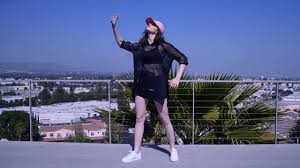

In [41]:
import cv2
from google.colab.patches import cv2_imshow
model=YOLO('yolo11n-pose.pt')
img=cv2.imread('/content/pop.jpg')
cv2_imshow(img)

In [42]:
results=model(img)[0]
#print(result) #이미지 하나니까 이렇게 처리 가능
# keypoints를 찾아야 함. 근데 얘네는 boxes도 같이 줌. 오늘은 키포인트만
# 키포인트 중에서 6번 8번 10번의 xy값을 원함.
#print(result.keypoints) # 이중이라 컨피던스를 분해해야함?
#print(result.keypoints.conf[0][6]) # 오른쪽 어깨의 컨피던스만 나옴.
# 세개를 따로 리스트로 받는 게 나을 거 같음
keypoints=result.keypoints
#print(keypoints)
# 여러가지 중에 특정 인덱스만 필요함
p_index=[6, 8, 10]
pos=[]
conf=[]
for i in p_index:
  #print(keypoints.conf[0][i]) # 6, 8, 10의 컨피던스만 나옴
  conf.append(keypoints.conf[0][i])
  pos.append(keypoints.xy[0][i])

print(conf)
print(pos)

angle = calculate_angle(pos[0], pos[1], pos[2])
print(angle)


0: 384x640 1 person, 161.3ms
Speed: 5.6ms preprocess, 161.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
[tensor(0.9883), tensor(0.9430), tensor(0.9265)]
[tensor([139.9125,  44.6733]), tensor([121.5246,  40.1003]), tensor([112.9297,  24.7530])]
133.21591394928032
